In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow_datasets

In [7]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:

import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [10]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [3]:
data.head(10)

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   
5  28b57f3990  http://www.dothebouncy.com/smf - some shameles...   
6  6e0c6d75b1  2am feedings for the baby are fun when he is a...   
7  50e14c0bb8                                         Soooo high   
8  e050245fbd                                        Both of you   
9  fc2cbefa9d   Journey!? Wow... u just became cooler.  hehe....   

                                       selected_text sentiment  
0                I`d have responded, if I were going   neutral  
1                                           Sooo SAD  negative  
2                                        bullying me  negative  
3                                     leave me alone  negative  
4                                      Sons of ****,  negative  
5  http://www.dothebouncy.com/smf - some shameles...   neutral  
6                                                fun  positive  
7                                         Soooo high   neutral  
8                                        Both of you   neutral  
9                       Wow... u just became cooler.  positive

In [4]:
data_test.head(10)

textID                                               text sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative
3  01082688c6                                        happy bday!  positive
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive
5  726e501993                    that`s great!! weee!! visitors!  positive
6  261932614e            I THINK EVERYONE HATES ME ON HERE   lol  negative
7  afa11da83f   soooooo wish i could, but im in school and my...  negative
8  e64208b4ef   and within a short time of the last clue all ...   neutral
9  37bcad24ca   What did you get?  My day is alright.. haven`...   neutral

In [5]:
data.drop(['textID'], axis = 1, inplace=True)
data_test.drop(['textID'], axis = 1, inplace=True)

In [6]:
data.head()

text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [7]:
data_test.head()

text sentiment
0  Last session of the day  http://twitpic.com/67ezh   neutral
1   Shanghai is also really exciting (precisely -...  positive
2  Recession hit Veronique Branquinho, she has to...  negative
3                                        happy bday!  positive
4             http://twitpic.com/4w75p - I like it!!  positive

In [8]:
data.isnull().sum(axis = 0)

text             1
selected_text    1
sentiment        0
dtype: int64

In [9]:
data_test.isnull().sum(axis = 0)

text         0
sentiment    0
dtype: int64

In [10]:
data.dropna(axis = 0,inplace = True)

In [11]:
data['sentiment'] = data['sentiment'].map({'positive': 1,
                             'negative': -1,
                             'neutral': 0},
                             na_action=None)

In [12]:
data_test['sentiment'] = data['sentiment'].map({'positive': 1,
                             'negative': -1,
                             'neutral': 0},
                             na_action=None)

In [13]:
positive = data[data['sentiment'] == 1]
negative = data[data['sentiment'] == -1]
neutral = data[data['sentiment'] == 0]
positive_test = data_test[data_test['sentiment'] == 1]
negative_test = data_test[data_test['sentiment'] == -1]
neutral_test = data_test[data_test['sentiment'] == 0]

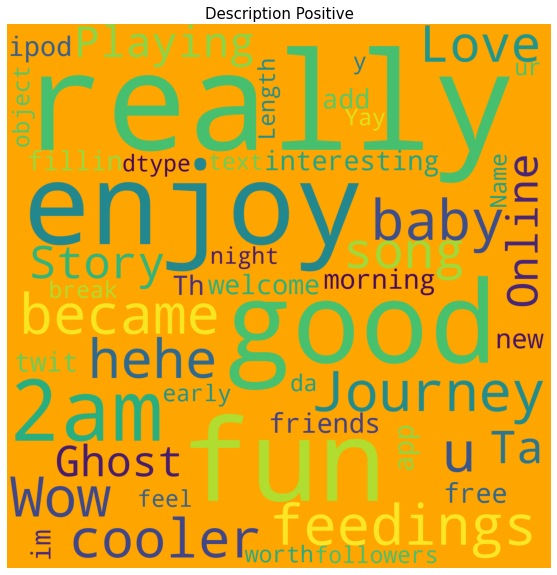

In [14]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(positive['text']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

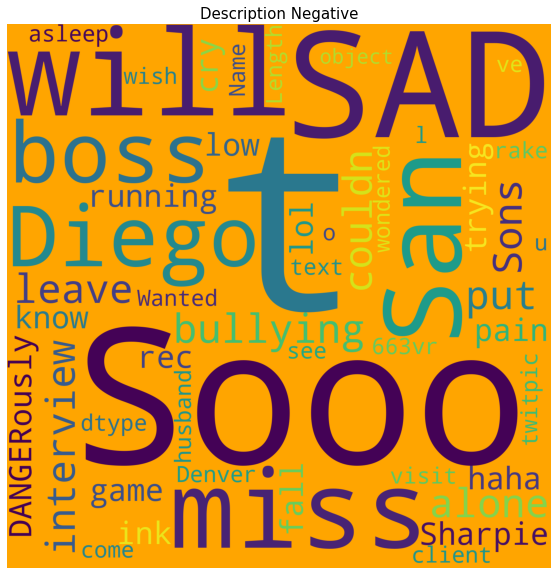

In [15]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(negative['text']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

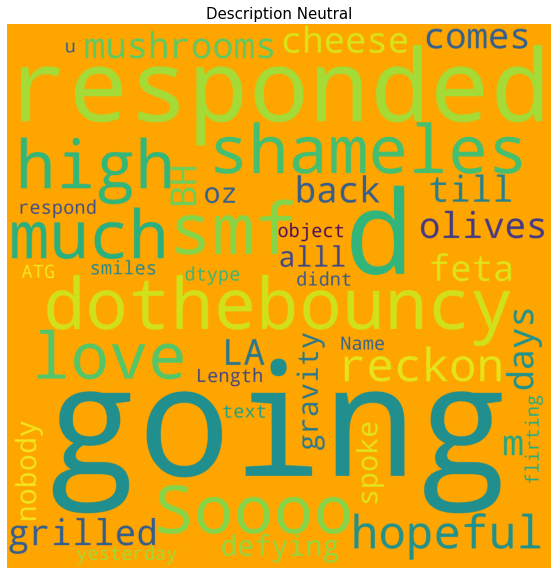

In [16]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(neutral['text']))
plt.title('Description Neutral', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [17]:
fig2 = px.histogram(data,x='sentiment',color='sentiment',template='plotly_dark')
fig2.show()

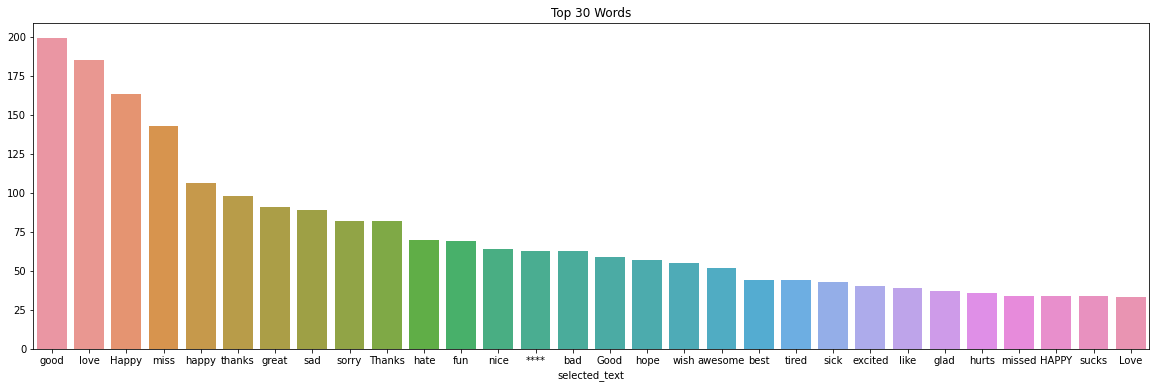

In [18]:
plt.figure(figsize=(20,6))
top_30 = data.groupby('selected_text')['selected_text'].count() \
.sort_values(ascending = False).head(30)
sns.barplot(x=top_30.index, y = top_30.values)
plt.title('Top 30 Words')
plt.show()

In [19]:
temp = data.describe()
temp.style.background_gradient(cmap='Purples')

In [20]:
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x >= 0 else 0)

In [21]:
X = data.iloc[:, 0].values
X

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype=object)

In [22]:
X.shape

(27480,)

In [23]:
y = data.iloc[:, 2].values
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
X, _, y, _ = train_test_split(X, y, stratify = y)

In [25]:
print(X.shape, y.shape )

(20610,) (20610,)


In [26]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1], dtype=int64), array([ 5836, 14774], dtype=int64))

In [27]:
def clean_t(t):
  t = BeautifulSoup(t, 'lxml').get_text()
  t = re.sub(r"@[A-Za-z0-9]+", ' ', t)
  t = re.sub(r"https?://[A-Za-z0-9./]+", ' ', t)
  t = re.sub(r"[^a-zA-Z.!?]", ' ', t)
  t = re.sub(r" +", ' ', t)
  return t

In [28]:
text = "I don't like"
text = clean_t(text)
text

'I don t like'

In [29]:
import spacy
nlp = spacy.blank("en")
nlp

In [30]:
stop_words = sp.lang.en.STOP_WORDS
print(stop_words)

{'mine', 'against', 'amongst', 'for', 'few', 'six', 'she', 'full', 'any', 'now', 'nevertheless', 'together', 'besides', 'take', '’ve', 'further', 'onto', '’d', 'above', 'although', 'whenever', 'whereafter', 'out', 'these', 'am', 'ca', 'please', 'whence', '‘m', 'that', 'because', 'are', 'whom', 'someone', 'move', 'even', "'ll", '’re', 'beyond', 'hence', 'quite', 'see', 'seems', 'both', 'then', 'keep', 'whither', 'various', 'whereby', 'ourselves', 'another', 'ever', 'to', 'moreover', 'enough', 'made', 'thru', 'twenty', 'could', 'thus', 'yours', 'get', 'her', 'seemed', 'though', 'least', 'top', 'regarding', 'via', "'s", '‘s', 'each', 'does', 'seem', 'herself', 'eleven', 'else', 'why', 'is', 'himself', 'or', 'ours', 'their', 'one', 'can', "'d", 'my', 'some', 'just', 'somewhere', 'yourself', '‘ll', 'we', 'did', 'done', 'cannot', 'empty', 'he', 'nowhere', '’s', 'down', 'thereby', 'them', 'becoming', 'most', 'thereupon', 'less', 'none', 'hereby', 'latterly', 'afterwards', 'formerly', 'front',

In [31]:
len(stop_words)

326

In [32]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
def clean_t2(tt):
  tt = tt.lower()
  document = nlp(tt)

  words = []
  for token in document:
    words.append(token.text)

  words = [word for word in words if word not in stop_words and word not in string.punctuation]
  words = ' '.join([str(element) for element in words])

  return words

In [34]:
text2 = clean_t2(text)
text2

'don t like'

In [35]:
data_clean = [clean_t2(clean_t(t)) for t in X]

In [36]:
for _ in range(10):
    print(data_clean[random.randint(0, len(data_clean) - 1)])

way people crying school picnic decide want public m confused sad
happy mother s day mothers
sure ... fanciful expensive ones basic ones expensive ... try hr m shopping place
g mornin
good day driving mountains visiting katie eating chips fudge stocking lovely smelling soaps
lohang listening music happy librefm audacious combination s profile
ik feel sooo bad
ahh normally jump m manning office solo today
jazzy vegas w team
lovely evening far quickly got home end coffee bed morning


In [37]:
data_labels = y
data_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
np.unique(data_labels)

array([0, 1], dtype=int64)

In [39]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [40]:
tokenizer.vocab_size

24633

In [41]:
print(tokenizer.subwords)

['s_', 'm_', 't_', ' ... ', '  ', 'day_', 'good_', ' .. ', 'got_', 'like_', 'going_', 'nt_', 'love_', 'happy_', 'don_', 'u_', ' ...', 'work_', 'know_', 'time_', 'today_', 'new_', 'think_', 'want_', 'll_', 'day', 'home_', 'oh_', 'hope_', 'night_', 'lol_', 'great_', 'thanks_', 'need_', 've_', ' .... ', 'feel_', 'miss_', 'wish_', 'lol', 'na_', 'gon_', 'morning_', 'mother_', 'sorry_', 'haha_', 'twitter_', 'bad_', 'yeah_', 'getting_', 'didn_', 'today', 'nice_', 'd_', 'come_', 'fun_', 'work', 'way_', 'tomorrow_', ' ..', 'mothers_', 'watching_', 'sad_', 'hate_', 'better_', 'hey_', 'bed_', 'right_', 'having_', 'sleep_', 'people_', 'tonight_', 'week_', 'wait_', 'long_', 'little_', 'weekend_', 'best_', 'mom_', 'yes_', 'awesome_', 'ur_', 'school_', 'feeling_', 'won_', 'thank_', 'days_', 'wanna_', 'look_', 'let_', 'sure_', 'thing_', 'night', 'time', 'good', 'tired_', 'man_', 'working_', 'ok_', 'trying_', 'looking_', 'find_', 'looks_', 'hours_', 'doesn_', 'went_', 'n_', 'maybe_', 'guess_', 'watch_'

In [42]:
ids = tokenizer.encode('I like')
ids

[24450, 24409, 161]

In [43]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

In [44]:
for _ in range(10):
    print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[5, 2371, 252, 356, 2041]
[3489, 89, 53, 88, 55, 163, 1, 257, 578, 185, 75, 77, 11669]
[2366, 1362, 83, 153, 5996, 1081, 213, 13206, 87, 2366, 5456]
[16, 729, 1198, 16, 47, 927, 729, 988]
[9742, 74, 21, 331, 9, 149, 1745, 198, 11, 633]
[2524, 473, 1054, 1, 38, 25, 7230, 12005]
[414, 7477, 49, 13417, 112, 376]
[3626, 30, 32, 56, 1, 1575, 2, 7893, 2, 50, 850]
[5, 14449, 1831, 317, 4, 24, 3869]
[39, 10, 4099, 10, 887, 156, 161]


In [45]:
max_len = max([len(sentence) for sentence in data_inputs])
max_len

43

In [46]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value = 0,
                                                            padding = 'post',
                                                            maxlen=max_len)

In [47]:
for _ in range(10):
    print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[    5  2921   194     3 17025     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]
[  21 1311   26    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
[  104    74  4827 13638     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]
[4288 1333  189  783  127    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
[ 2319  8388   208 21569 13547   5

In [48]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size=0.3,
                                                                        stratify = data_labels)

In [49]:
print(train_inputs.shape, train_labels.shape)

(14427, 43) (14427,)


In [50]:
print(test_inputs.shape, test_labels.shape )

(6183, 43) (6183,)


In [51]:
class DCNN(tf.keras.Model):
    def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
        super(DCNN, self).__init__(name=name)
        self.embedding = layers.Embedding(vocab_size, emb_dim)
        self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')
        self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')
        self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')
        self.pool = layers.GlobalMaxPool1D()
        

        self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
        self.dropout = layers.Dropout(rate = dropout_rate)
        if nb_classes == 2:
            self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
        else:
            self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')
    def call(self, inputs, training):
        x = self.embedding(inputs)
        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)

        merged = tf.concat([x_1, x_2, x_3], axis = -1)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output = self.last_dense(merged)
        return output
        
  

In [52]:
vocab_size = tokenizer.vocab_size
vocab_size

24633

In [53]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
batch_size = 64
nb_classes = len(set(train_labels))
nb_classes

2

In [54]:
dropout_rate = 0.2
nb_epochs = 5  

In [55]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)

In [56]:
if nb_classes == 2:
    Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
    Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
history = Dcnn.fit(train_inputs, train_labels,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10)

Epoch 1/5
203/203 [==============================] - 26s 125ms/step - loss: 0.4911 - accuracy: 0.7710 - val_loss: 0.4438 - val_accuracy: 0.8115
Epoch 2/5
203/203 [==============================] - 24s 120ms/step - loss: 0.2437 - accuracy: 0.9045 - val_loss: 0.4937 - val_accuracy: 0.8018
Epoch 3/5
203/203 [==============================] - 23s 114ms/step - loss: 0.0827 - accuracy: 0.9743 - val_loss: 0.7167 - val_accuracy: 0.7782
Epoch 4/5
203/203 [==============================] - 24s 116ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.8019 - val_accuracy: 0.7665
Epoch 5/5
203/203 [==============================] - 22s 108ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.9379 - val_accuracy: 0.7734


In [58]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

97/97 [==============================] - 1s 11ms/step - loss: 0.8821 - accuracy: 0.7834
[0.8820989727973938, 0.7834384441375732]


In [59]:
y_pred_test = Dcnn.predict(test_inputs)

194/194 [==============================] - 2s 9ms/step


In [60]:
y_pred_test

array([[9.7748303e-01],
       [9.9992806e-01],
       [3.0856069e-02],
       ...,
       [7.2207111e-01],
       [3.6029267e-04],
       [9.9861646e-01]], dtype=float32)

In [61]:
y_pred_test = (y_pred_test > 0.5)
y_pred_test

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [62]:
test_labels

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [71]:
from sklearn.metrics import confusion_matrix ,accuracy_score
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[1094,  657],
       [ 682, 3750]], dtype=int64)

<AxesSubplot:>

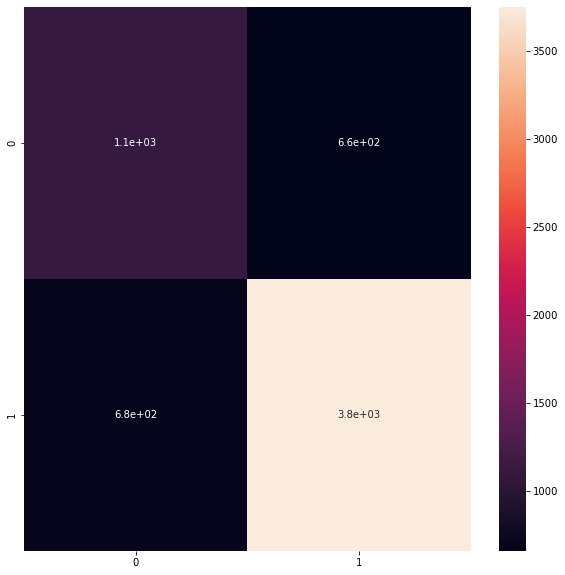

In [64]:
sns.heatmap(cm, annot=True)

In [72]:
accuracy_score(test_labels, y_pred_test)

0.7834384602943555

In [65]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

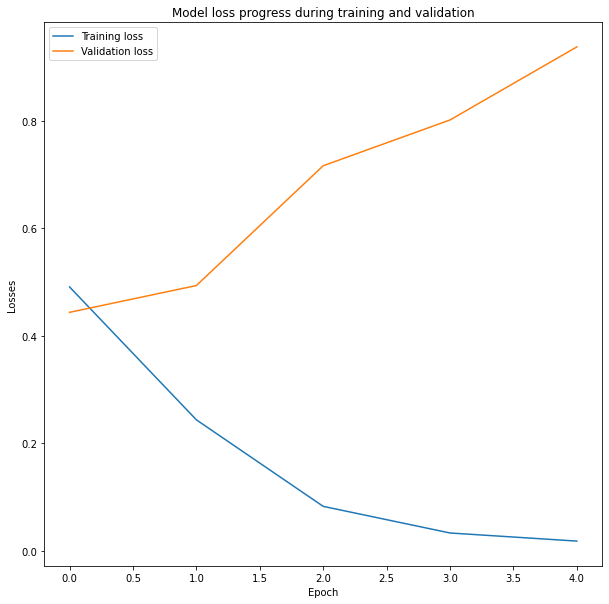

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training loss', 'Validation loss'])

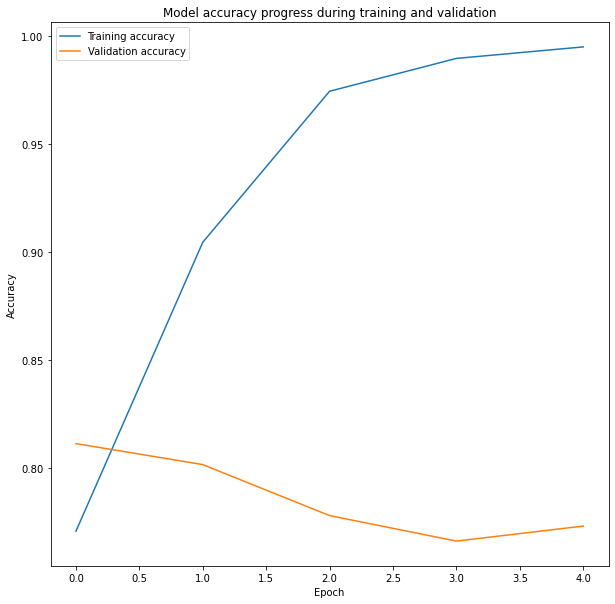

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

In [68]:
text = "I hate"
text = tokenizer.encode(text)
Dcnn(np.array([text]), training=False).numpy()

array([[0.00660015]], dtype=float32)

In [69]:
text = "I happy"
text = tokenizer.encode(text)
Dcnn(np.array([text]), training=False).numpy()

array([[0.9411876]], dtype=float32)

In [70]:
text = "It is complicated"
text = tokenizer.encode(text)
Dcnn(np.array([text]), training=False).numpy()

array([[0.00190933]], dtype=float32)